In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#http://www.numpy.org/
#https://pandas.pydata.org/
#https://stackoverflow.com/
#http://scikit-learn.org/stable/

In [2]:
features = pd.read_csv('features_1.csv')

In [3]:
features

,Person,Dominant Hand,D _left,ang_f_left,frequency left,MSE_l,D_right,ang_f_right,frequency right,MSE_r,RMS_left,RMS_right
0,Subject 1,Right,0.0722,0.0577,0.5510,0.0148,0.0052,0.2949,2.8161,0.0038,27.0602,26.9814
1,Subject 1,Right,0.0183,0.2734,2.6108,0.0141,0.0094,0.2711,2.5888,0.0014,26.5914,32.4993
2,Subject 2,Left,0.0033,0.2711,2.5888,0.0052,0.0050,0.2623,2.5048,0.0025,34.6764,39.7976
3,Subject 3,Right,0.1422,0.6238,2.9784,0.0606,0.0096,0.6542,3.1236,0.0442,64.4955,34.9224
4,Subject 4,Left,0.0143,0.6440,3.0749,0.0106,0.1140,0.7525,3.5929,0.0251,33.3332,22.9964
5,Subject 5,Right,0.0290,0.3559,1.6993,0.0325,0.0029,0.3650,1.7427,0.0039,34.2861,31.0972
6,Subject 5,Right,0.0377,0.3692,1.7628,0.0487,0.0058,0.3822,1.8249,0.0137,39.6299,25.4194
7,Subject 6,Right,0.0152,0.0537,0.2564,0.0942,0.0335,0.1264,0.6035,0.0333,30.3168,15.2324
8,Subject 7,Right,0.0066,0.5455,2.6046,0.0077,0.0068,0.5151,2.4594,0.0122,74.2296,52.8092
9,Subject 8,Right,0.0257,0.5439,2.5969,0.0331,0.0038,0.5723,2.7325,0.0047,103.8274,113.6022


In [4]:
features['dominant'] = np.where(features['Dominant Hand']=='Left',features['frequency left'] ,features['frequency right'])

In [5]:
features['dominant']

0     2.8161
1     2.5888
2     2.5888
3     3.1236
4     3.0749
5     1.7427
6     1.8249
7     0.6035
8     2.4594
9     2.7325
10    2.7650
11    2.3085
12    2.1666
13    1.6850
14    2.2520
15    2.2031
16    1.9699
17    1.4028
18    3.3079
19    1.8105
Name: dominant, dtype: float64

In [6]:
features['non-dominant'] = np.where(features['Dominant Hand']=='Left',features['frequency right'] ,features['frequency left'])

In [7]:
features['non-dominant']

0     0.5510
1     2.6108
2     2.5048
3     2.9784
4     3.5929
5     1.6993
6     1.7628
7     0.2564
8     2.6046
9     2.5969
10    2.5950
11    2.3744
12    2.2049
13    1.0552
14    2.1709
15    2.2922
16    2.1351
17    3.6665
18    2.8562
19    1.9175
Name: non-dominant, dtype: float64

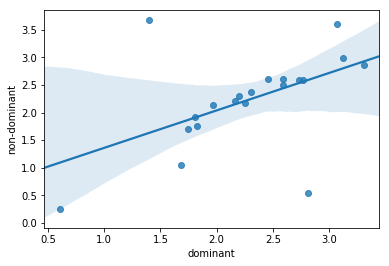

In [8]:
fig = plt.figure()
sns.regplot(x="dominant", y="non-dominant", data=features);
fig.savefig('dominance_cor.pdf', dpi=fig.dpi)

In [9]:
X_init = features[['D _left', 'ang_f_left', 'frequency left', 'D_right',
       'ang_f_right', 'frequency right', 'RMS_left', 'RMS_right',]] 


In [10]:
corr = X_init.corr()
print(corr)

                  D _left  ang_f_left  frequency left   D_right  ang_f_right  \
D _left          1.000000   -0.154020       -0.236863 -0.026334     0.247037   
ang_f_left      -0.154020    1.000000        0.844391  0.257119     0.780836   
frequency left  -0.236863    0.844391        1.000000  0.133671     0.573578   
D_right         -0.026334    0.257119        0.133671  1.000000     0.426748   
ang_f_right      0.247037    0.780836        0.573578  0.426748     1.000000   
frequency right  0.281844    0.461294        0.575392  0.286148     0.762971   
RMS_left        -0.130604    0.443830        0.460418 -0.094240     0.352417   
RMS_right       -0.070078    0.280965        0.344112 -0.072413     0.363611   

                 frequency right  RMS_left  RMS_right  
D _left                 0.281844 -0.130604  -0.070078  
ang_f_left              0.461294  0.443830   0.280965  
frequency left          0.575392  0.460418   0.344112  
D_right                 0.286148 -0.094240  -0.072413  

In [11]:
print(X_init.columns)

Index(['D _left', 'ang_f_left', 'frequency left', 'D_right', 'ang_f_right',
       'frequency right', 'RMS_left', 'RMS_right'],
      dtype='object')


In [12]:
# source : https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,D _left,ang_f_left,frequency left,D_right,ang_f_right,frequency right,RMS_left,RMS_right
D _left,1,-0.15,-0.24,-0.026,0.25,0.28,-0.13,-0.07
ang_f_left,-0.15,1,0.84,0.26,0.78,0.46,0.44,0.28
frequency left,-0.24,0.84,1,0.13,0.57,0.58,0.46,0.34
D_right,-0.026,0.26,0.13,1,0.43,0.29,-0.094,-0.072
ang_f_right,0.25,0.78,0.57,0.43,1,0.76,0.35,0.36
frequency right,0.28,0.46,0.58,0.29,0.76,1,0.33,0.42
RMS_left,-0.13,0.44,0.46,-0.094,0.35,0.33,1,0.85
RMS_right,-0.07,0.28,0.34,-0.072,0.36,0.42,0.85,1


In [13]:
X = X_init[['D _left','frequency left', 'D_right', 'frequency right', 'RMS_left', 'RMS_right']]

y = features['Dominant Hand']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['Left', 'Right'])

array([0, 1])

In [14]:
# SVM Classifier with cross validation
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

/Users/tanmaiyiirao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tanmaiyiirao/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
# this code has been taken from skikit learn and sebastain raschka
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#https://github.com/rasbt/python-machine-learning-book-2nd-edition
#https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
# load and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# pipeline setup
cls = SVC(C=10.0, 
          kernel='linear', 
          gamma=0.1, 
          decision_function_shape='ovr')

linear_svm = Pipeline([('std', StandardScaler()),('svc', cls)])

# gridsearch setup
param_grid = [
  {'svc__C': [1, 10, 100, 1000], 
   'svc__gamma': [0.001, 0.0001], 
   'svc__kernel': ['linear']},
 ]

gs = GridSearchCV(estimator=linear_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=-1, 
                  cv=5, 
                  verbose=1, 
                  refit=True)

# run gridearch
cls.probability = True
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001], 'svc__kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [16]:
#https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
print('Best Grid Search Score %.2f' % gs.best_score_)
print('best Grid Search Parameters %s' % gs.best_params_)


# prediction on the training set
y_pred = gs.predict(X_train)
train_acc = (y_train == y_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.2f' % (train_acc))

# evaluation on the test set
y_pred = gs.predict(X_test)
print(y_pred)
print(y_test)
test_acc = (y_test == y_pred).sum()/len(y_test)
print('\nTest Accuracy: %.2f' % (test_acc))

Best Grid Search Score 0.73
best Grid Search Parameters {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}

Train Accuracy: 0.93
[1 0 1 1 1]
[1 1 1 1 1]

Test Accuracy: 0.80


In [17]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[[0 0]
 [1 4]]


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


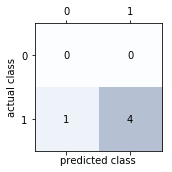

In [18]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted class')
plt.ylabel('actual class')

plt.tight_layout()
plt.savefig('confusion_matrix_svm.pdf', dpi=fig.dpi)
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve


print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label = 1))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label = 1))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=1))



Precision: 1.000
Recall: 0.800
F1: 0.889


In [21]:

from sklearn.metrics import precision_recall_curve
cls.probability = True
X_test = X_test.iloc[:]
y_scores=gs.predict_proba(X_test)
prec, rec, tre = precision_recall_curve(y_test, y_scores[:,1])
print(prec[:-1])
print(rec)
y_scores1=nB.predict_proba(X_test)
prec1, rec1, tre1 = precision_recall_curve(y_test, y_scores1[:,1])
fig23 = plt.figure()
plt.plot(rec, prec, 'b--', label='SVM')
plt.plot(rec1, prec1, 'g--', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper left')
plt.show()

[1. 1. 1. 1. 1.]
[1.  0.8 0.6 0.4 0.2 0. ]


NameError: name 'nB' is not defined

In [22]:
print(y_test)

[1 1 1 1 1]


In [23]:
print(y_pred)

[1 0 1 1 1]


In [26]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
# this code has been taken from scikit learn

from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

from sklearn.model_selection import KFold

clf1 = GaussianNB()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=0)
clf1.fit(X_train1, y_train1)

nB = Pipeline([('std', StandardScaler()),('gaussianNB', clf1)])
nB.fit(X_train, y_train)
y_pred = nB.predict(X_train)
train_acc = (y_train == y_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.2f' % (train_acc))

# evaluation on the test set
y_pred1 = nB.predict(X_test1)
print(y_pred1)
print(y_test1)
test_acc = (y_test1 == y_pred1).sum()/len(y_test1)
print('\nTest Accuracy: %.2f' % (test_acc))


Train Accuracy: 0.93
[1 0 1 1]
[1 1 1 1]

Test Accuracy: 0.75


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test1, y_pred=y_pred1, pos_label = 1))
print('Recall: %.3f' % recall_score(y_true=y_test1, y_pred=y_pred1, pos_label = 1))
print('F1: %.3f' % f1_score(y_true=y_test1, y_pred=y_pred1, pos_label= 1))

Precision: 1.000
Recall: 0.750
F1: 0.857


[[0 0]
 [1 4]]


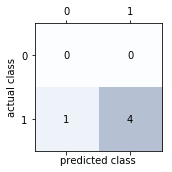

In [30]:
from sklearn.metrics import confusion_matrix

nB.fit(X_train, y_train)
y_pred = nB.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted class')
plt.ylabel('actual class')

plt.tight_layout()
plt.savefig('confusion_matrix_NB.pdf', dpi=fig.dpi)
plt.show()